<a href="https://colab.research.google.com/github/Pasindu2000B/EC_7212_ASSIGNMENT_2/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

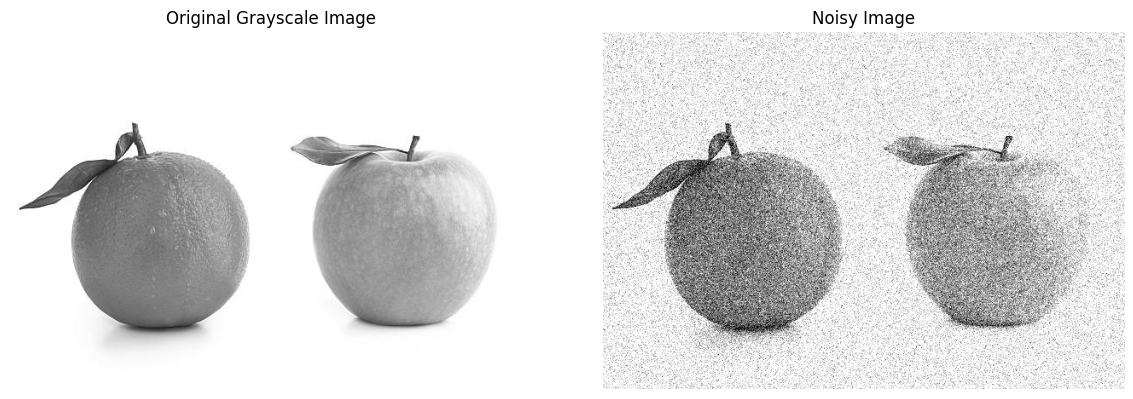

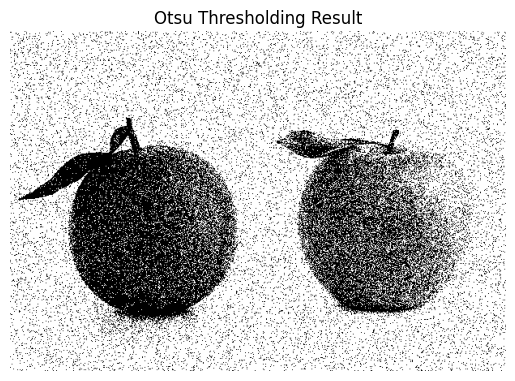

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from skimage.filters import threshold_otsu


url = "https://github.com/Pasindu2000B/EC_7212_ASSIGNMENT_2/raw/main/istockphoto-637563258-612x612.jpg"
resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

mean = 3
std_dev = 50
gaussian_noise = np.random.normal(mean, std_dev, image.shape)
noisy_image = image + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

# Apply Otsu
threshold = threshold_otsu(noisy_image)
binary_otsu = (noisy_image > threshold).astype(np.uint8) * 255
plt.imshow(binary_otsu, cmap='gray')
plt.title("Otsu Thresholding Result")
plt.axis('off')
plt.show()


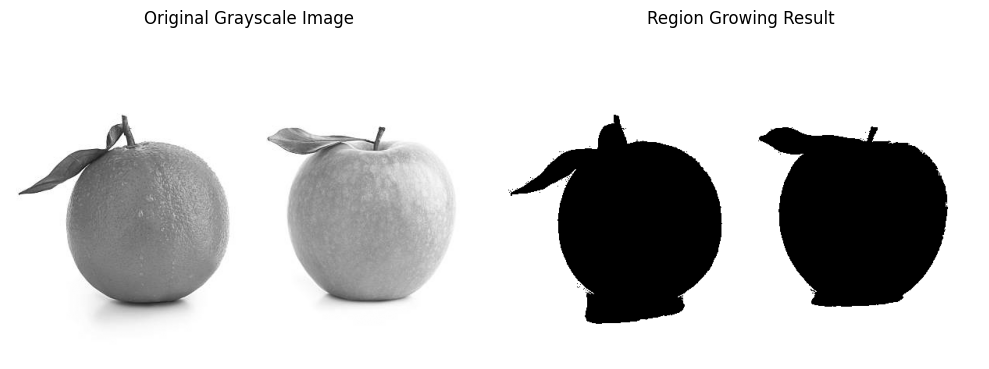

In [26]:

def region_growing(image, seed_points, threshold=10):
    rows, cols = image.shape
    segmented = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=bool)

    for seed in seed_points:
        x, y = seed
        seed_value = image[x, y]
        region = [(x, y)]

        while region:
            i, j = region.pop()
            if visited[i, j]:
                continue

            visited[i, j] = True
            current_value = image[i, j]

            if abs(int(current_value) - int(seed_value)) <= threshold:
                segmented[i, j] = 255
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        ni, nj = i + dx, j + dy
                        if (0 <= ni < rows and 0 <= nj < cols and not visited[ni, nj]):
                            region.append((ni, nj))

    return segmented

# Apply region growing
seed_points = [(300, 300)]  # Adjust if needed
segmented_image = region_growing(image, seed_points, threshold=15)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Region Growing Result")
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()